## Importing the libraries and data

In [1]:
import pandas as pd
import string
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow
import os
import tqdm
from PIL import Image
import cv2
%matplotlib inline

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model


## We import data and encode them

In [5]:
with open('/home/thanos/Desktop/Sustainable_fashion/repos/Recommendation_tool/Outfits_Outerwear_Tops_Bottoms.json') as f:
    data1 = json.load(f)
df = pd.DataFrame(data1)

In [6]:
df = df[["likes","items","set_id"]]

In [4]:
df['log_likes'] = np.log(df.likes)

<Axes: >

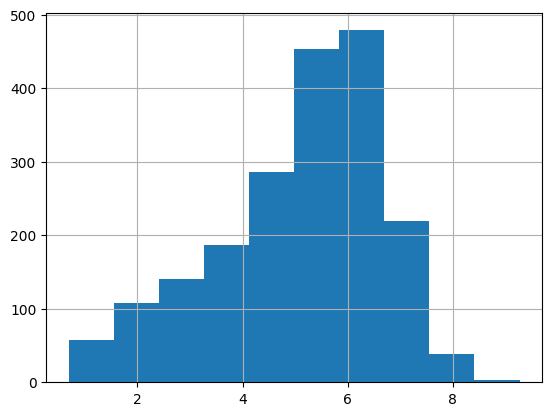

In [5]:
df['log_likes'].hist()

<Axes: >

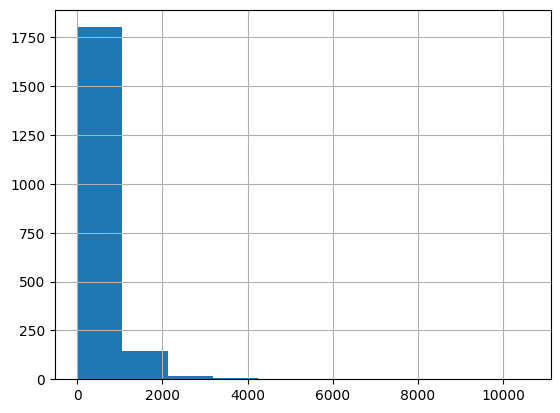

In [4]:
df['likes'].hist()

In [6]:
df

,likes,items,set_id,log_likes
0,394,"[{'index': 1, 'categoryid': 4495, 'likes': 10,...",214181831,5.976351
1,32,"[{'index': 1, 'categoryid': 104, 'likes': 2009...",143656996,3.465736
2,492,"[{'index': 1, 'categoryid': 11, 'likes': 94, '...",213824660,6.198479
3,212,"[{'index': 1, 'categoryid': 21, 'likes': 622, ...",152669888,5.356586
4,139,"[{'index': 1, 'categoryid': 4495, 'likes': 156...",215196328,4.934474
...,...,...,...,...
1968,1652,"[{'index': 1, 'categoryid': 17, 'likes': 83, '...",151650613,7.409742
1969,284,"[{'index': 1, 'categoryid': 104, 'likes': 3032...",165632348,5.648974
1970,384,"[{'index': 1, 'categoryid': 19, 'likes': 3, 'i...",213826418,5.950643
1971,214,"[{'index': 1, 'categoryid': 17, 'likes': 43, '...",216860218,5.365976


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   likes   1973 non-null   int64 
 1   items   1973 non-null   object
 2   set_id  1973 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.4+ KB


In [6]:
# ##### THIS CODE IS OPTIONAL##############
# ##### Here we check if all the images are exist in the data path that we have all the images together with their item_id
# # Data path
# data_path = '/home/thanos/Desktop/Sustainable_fashion/data/polyvore_vong/all_images/'

# # Initialize a list to hold item_ids of non-existent files
# missing_files = []

# # Iterate through each row in the DataFrame
# for index, row in df.iterrows():
#     items = row['items']  # Get the items
    
#     # Iterate through each item in items
#     for item in items:
#         # Create a file path using item_id
#         file_path = os.path.join(data_path, f"{item['item_id']}.jpg")  # assuming images are in jpg format
        
#         # Check if the file exists, and if not, add to missing_files
#         if not os.path.exists(file_path):
#             missing_files.append(item['item_id'])

# # Check if there are any missing files and print the respective message
# if missing_files:
#     print("Some item images are missing:", missing_files)
# else:
#     print("All item images exist.")

All item images exist.


In [8]:
# We create a new data frame with columns the different categories and the set_id and likes from the previous dataframe
# Every row has an set or Outfit, the categories columns have the paths of the images corresponding to the category they 
# belong through the "items" of the previous dataset. Columns of set_id has the set id as it says and "likes" column has the corresponding number of likes we want to predict

# Your data path
data_path = '/home/thanos/Desktop/Sustainable_fashion/data/polyvore_vong/all_images/'

# Assuming df is your DataFrame containing 'likes', 'items', and 'set_id'

# Create a new DataFrame to hold the paths
columns = ['Tops', 'Bottoms', 'Bags', 'Outwear', 'Shoes', 'Accessories', 'set_id', 'likes']
df_image_paths = pd.DataFrame(columns=columns)

# Iterate through each row in the original DataFrame
for index, row in df.iterrows():
    new_row = {}
    items = row['items']  # Get the items
    
    # Iterate through each item in items
    for item in items:
        # Add the item's image path to the new row under the respective category column
        new_row[item['category_name']] = os.path.join(data_path, f"{item['item_id']}.jpg")  # or whichever your image format is
    
    # Add the set_id and likes to the new row
    new_row['set_id'] = row['set_id']
    new_row['likes'] = row['likes']
    
    # Append the new row to the new DataFrame
    df_image_paths = df_image_paths.append(new_row, ignore_index=True)

# Ensure the 'set_id' and 'likes' columns are of integer type
df_image_paths['set_id'] = df_image_paths['set_id'].astype(int)
df_image_paths['likes'] = df_image_paths['likes'].astype(int)


<ipython-input-8-80375488fffb>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_image_paths = df_image_paths.append(new_row, ignore_index=True)
<ipython-input-8-80375488fffb>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_image_paths = df_image_paths.append(new_row, ignore_index=True)
<ipython-input-8-80375488fffb>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_image_paths = df_image_paths.append(new_row, ignore_index=True)
<ipython-input-8-80375488fffb>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_image_paths = df_image_paths.append(new_row, ignore_index=True)
<ipython-input-8-80375488fffb>:29: FutureWarning: Th

In [9]:
df_image_paths['log_likes'] = np.log(df_image_paths.likes)

In [10]:
df_image_paths

,Tops,Bottoms,Bags,Outwear,Shoes,Accessories,set_id,likes,log_likes
0,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,214181831,394,5.976351
1,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,143656996,32,3.465736
2,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,213824660,492,6.198479
3,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,152669888,212,5.356586
4,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,215196328,139,4.934474
...,...,...,...,...,...,...,...,...,...
1968,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,151650613,1652,7.409742
1969,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,165632348,284,5.648974
1970,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,213826418,384,5.950643
1971,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,/home/thanos/Desktop/Sustainable_fashion/data/...,216860218,214,5.365976


In [11]:
#### OPTIONAL FUNCTION ######
# We use this function to display the outfits with all their items together row by row.

def display_outfit(row_number):    
    #   Assuming you want to display images from the first row
    # Extract the paths for image files
    image_paths = df_image_paths.iloc[row_number, 0:6].values
    categories = df_image_paths.columns[0:6]  # Extracting category names

    # Create a subplot with 2 rows and 3 columns as we have 6 categories
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Iterate through axes, image paths, and category names to display images
    for ax, path, category in zip(axes.flatten(), image_paths, categories):
        # Open and display the image
        img_np = cv2.imread(path, cv2.IMREAD_COLOR)
        im = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
        #im = cv2.resize(im, (64,64))
        im = im/255
        ax.imshow(im)
        ax.set_title(category)  # Set the title as the category name
        ax.axis('off')  # Hide the axis

    # Adjust spacing
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()


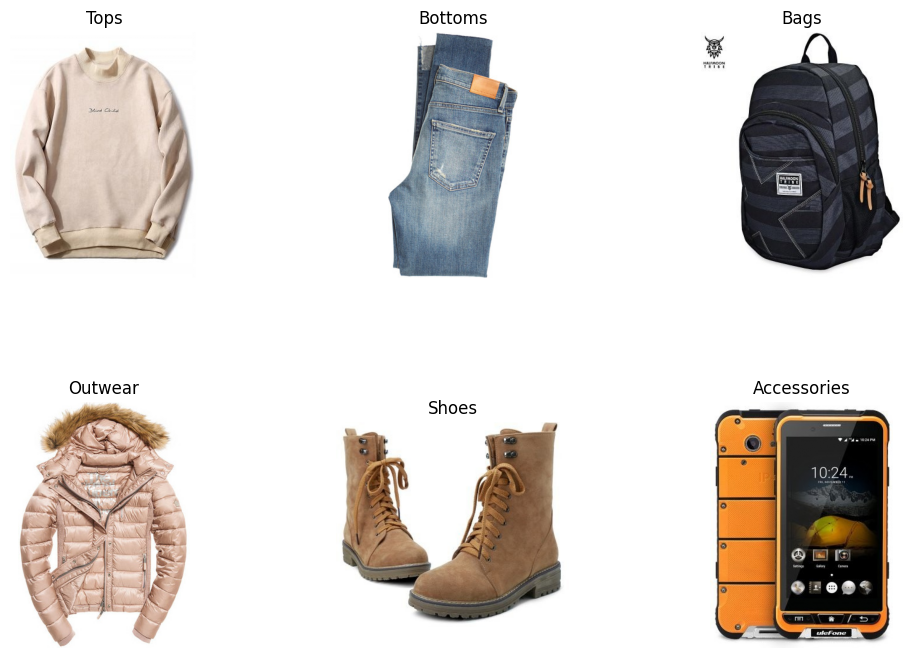

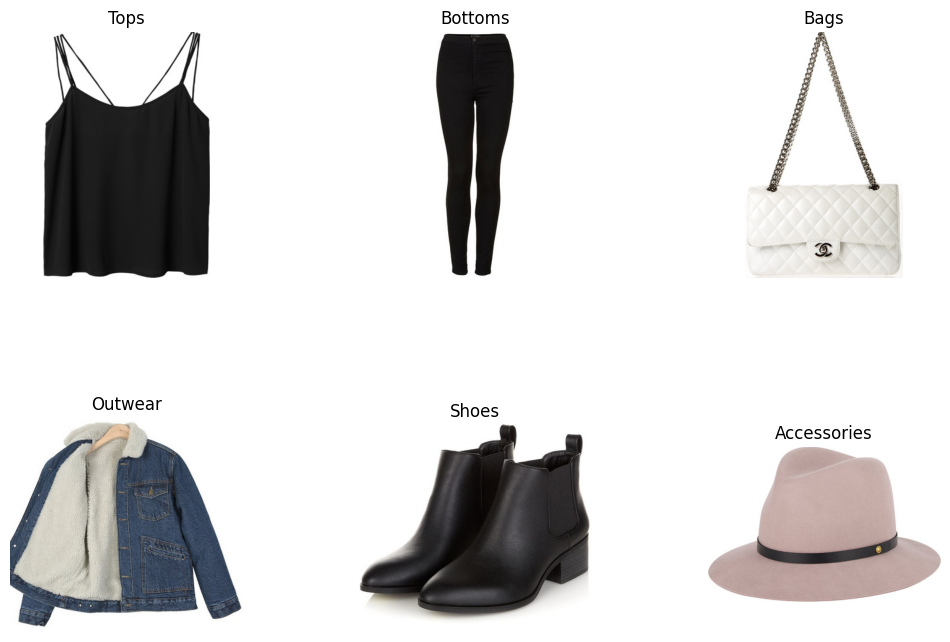

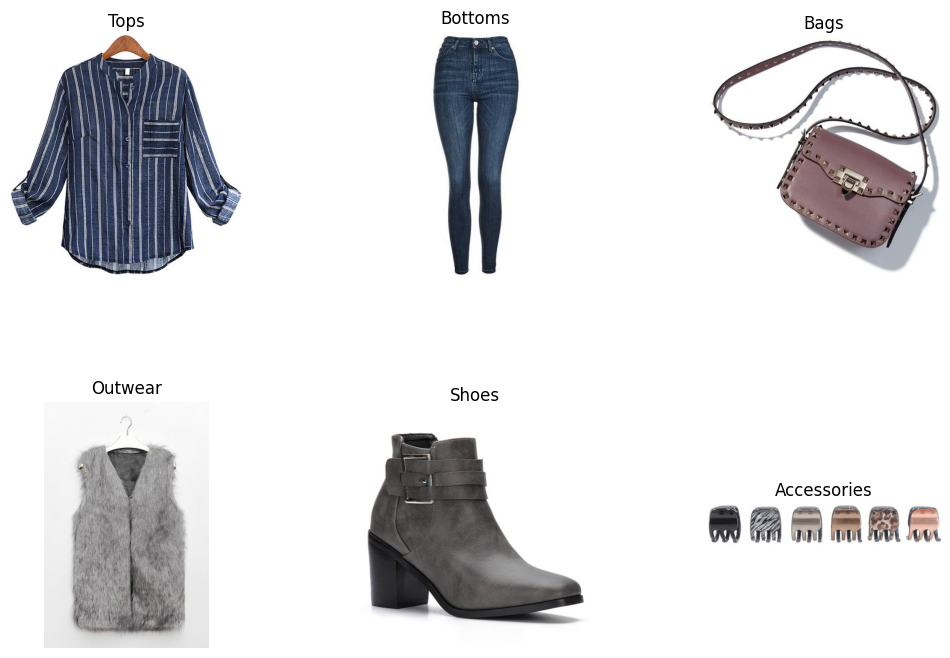

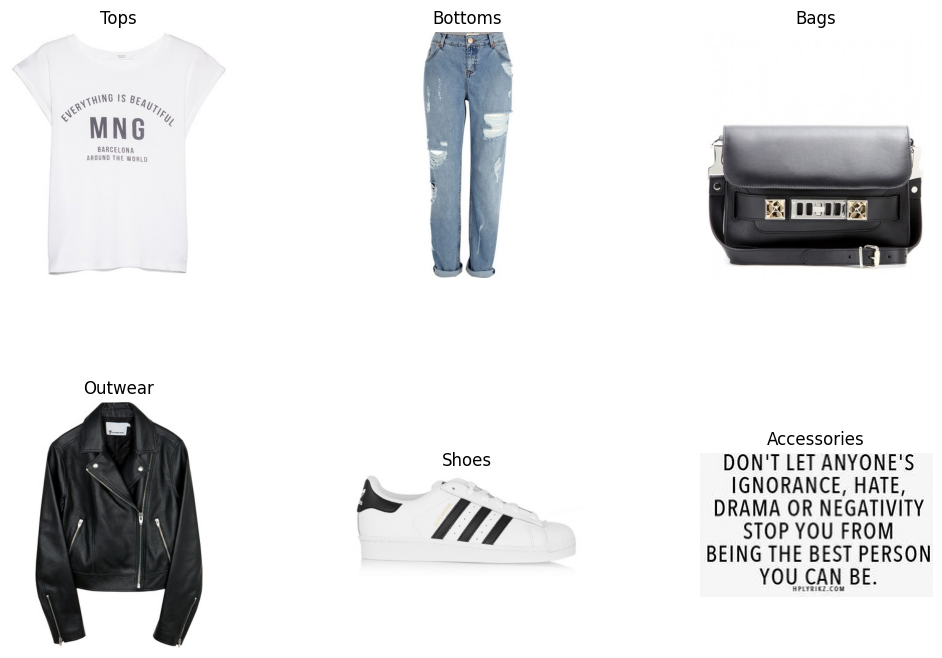

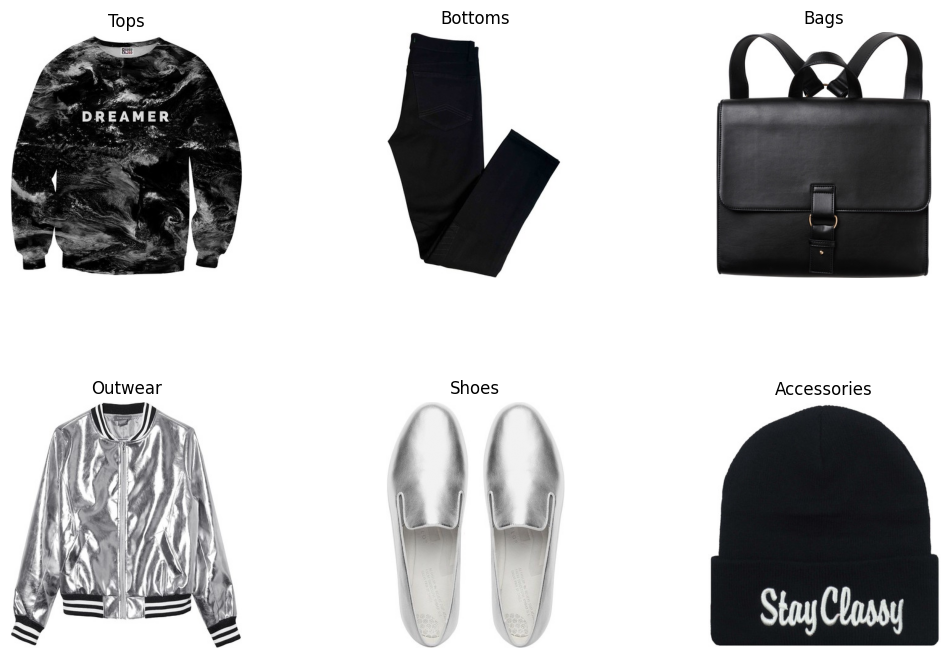

In [12]:
for i in range(0,5):
    display_outfit(i)

In [13]:
def preprocess_image_1(im_path):
    img_np = cv2.imread(im_path, cv2.IMREAD_COLOR)
    img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
    im = cv2.resize(img_np, (64,64))
    im = im/255  
    return im

In [14]:
y = df_image_paths["log_likes"].values

In [30]:
y.shape

(1973,)

In [16]:
#We keep the categories here
categories = df_image_paths.columns[0:6]

In [17]:
# getting the numpy values of the categories
df_image_paths_numpy = df_image_paths.iloc[:, 0:6].values


In [18]:
# Creates a vectorized version of our function 'preprocess_image_1' in order to apply it on each element of numpy array
vfunc = np.vectorize(preprocess_image_1, otypes=[np.ndarray])
df_images_numpy = vfunc(df_image_paths_numpy)

In [19]:
df_images_numpy[0][0].shape

(64, 64, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

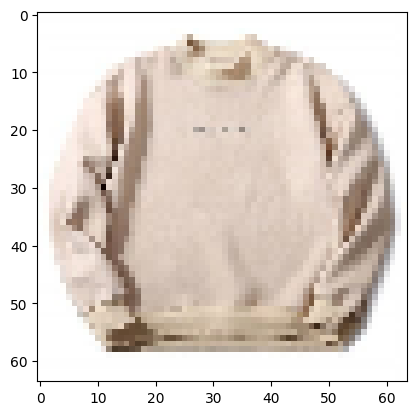

In [20]:
#printing some items for our help
plt.imshow(df_images_numpy[0][0])
plt.show

In [21]:
categories


Index(['Tops', 'Bottoms', 'Bags', 'Outwear', 'Shoes', 'Accessories'], dtype='object')

In [22]:
Tops_array = df_images_numpy[:,0]
Bottoms_array = df_images_numpy[:,1]
Bags_array = df_images_numpy[:,2]
Outwear_array = df_images_numpy[:,3]
Shoes_array = df_images_numpy[:,4]
Accessories_array = df_images_numpy[:,5]


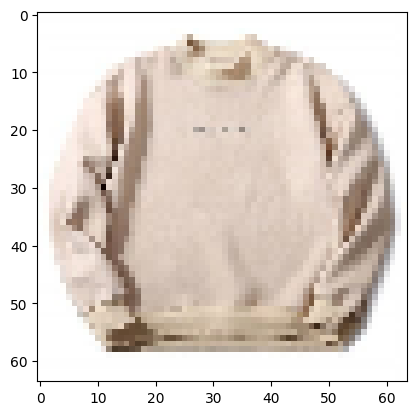

In [23]:
plt.imshow(Tops_array[0])



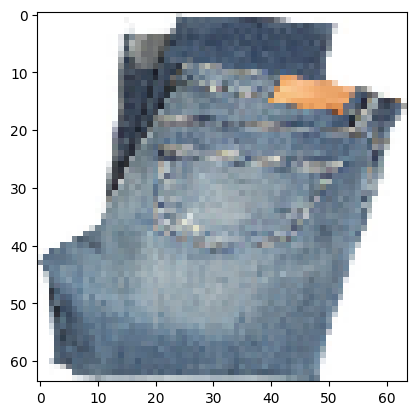

In [24]:
plt.imshow(Bottoms_array[0])


## Load encoder models and get the embeddings

In [25]:
# Loading all the encoders models and load them to a dictionary of models with name the categoty of the encoder that it corresponds
categories = df_image_paths.columns[0:6]
# Initialize a dictionary to hold your models
models = {}
model_path = '/home/thanos/Desktop/Sustainable_fashion/data/models/Models_autoencoders/'

# Loop through each category
for category in categories:
    # Construct the file path
    model_path = f"/home/thanos/Desktop/Sustainable_fashion/data/models/Models_autoencoders/{category}_embedding_model.h5"
    if os.path.exists(model_path):
            # Load the model and store it in the dictionary
            models[category] = load_model(model_path)
            print(f"{category} model loaded successfully.")
    else:
            print(f"No model available for {category}, file does not exist.")


Tops model loaded successfully.
Bottoms model loaded successfully.
Bags model loaded successfully.
Outwear model loaded successfully.
Shoes model loaded successfully.
Accessories model loaded successfully.


In [ ]:
####### IMPORTANT ##########
# Our arrays of the cloths have shape Tops_array.shape -->  (1973,) and the Tops_array[0] --> (64,64,3)
# Our input expects (batch_size, width, height, channels) or (1973,64,64,3) 
# To transform our dimensions and make it a 4D tensor we use np.stack

In [26]:
####### IMPORTANT ##########
# Our arrays of the cloths have shape Tops_array.shape -->  (1973,) and the Tops_array[0] --> (64,64,3)
# Our input expects (batch_size, width, height, channels) or (1973,64,64,3) 
# To transform our dimensions and make it a 4D tensor we use np.stack
Tops_array_4D = np.stack(Tops_array, axis=0)
Bottoms_array_4D = np.stack(Bottoms_array, axis=0)
Bags_array_4D = np.stack(Bags_array, axis=0)
Outwear_array_4D = np.stack(Outwear_array, axis=0)
Shoes_array_4D = np.stack(Shoes_array, axis=0)
Accessories_array_4D = np.stack(Accessories_array, axis=0)

In [27]:
Tops_array_4D.shape

(1973, 64, 64, 3)

In [28]:
Tops_embeddings = models['Tops'].predict(Tops_array_4D)
Bottoms_embeddings = models['Bottoms'].predict(Bottoms_array_4D)
Bags_embeddings = models['Bags'].predict(Bags_array_4D)
Outwear_embeddings = models['Outwear'].predict(Outwear_array_4D)
Shoes_embeddings = models['Shoes'].predict(Shoes_array_4D)
Accessories_embeddings = models['Accessories'].predict(Accessories_array_4D)

62/62 [==============================] - 2s 31ms/step


In [33]:
Tops_embeddings.shape

(1973, 16)

## We try to implement the model that takes as input images from different channels

In [ ]:
scaler = StandardScaler()

In [ ]:
y_scaled = scaler.fit_transform(y)

In [64]:
# Define the shape of your input images (height, width, channels)
input_shape = (16,)

In [51]:
# We map here every layer to a specific input
input_shape = (16,)
# Create seven input layers
input1 = Input(shape=input_shape, name="Embeddings_Tops")
input2 = Input(shape=input_shape, name="Embeddings_Bottom")
input3 = Input(shape=input_shape, name="Embeddings_Shoes")
input4 = Input(shape=input_shape, name="Embeddings_Bags")
input5 = Input(shape=input_shape, name="Embeddings_Accessories")
#input6 = Input(shape=input_shape, name="Embeddings_Onepiece")
input6 = Input(shape=input_shape, name="Embeddings_Oterwear")

fc1 = Dense(128, activation='relu')(input1)
fc2 = Dense(128, activation='relu')(input2)
fc3 = Dense(128, activation='relu')(input3)
fc4 = Dense(128, activation='relu')(input4)
fc5 = Dense(128, activation='relu')(input5)
fc6 = Dense(128, activation='relu')(input6)
#fc7 = Dense(128, activation='relu')(input7)

# Concatenate all the fully connected layers' outputs
concatenated = Concatenate()([fc1, fc2, fc3, fc4, fc5, fc6])


# Additional Fully Connected layer on concatenated outputs
fc_final1 = Dense(128, activation='linear')(concatenated)
fc_final2 = Dense(64, activation='relu')(fc_final1)
fc_final3 = Dense(32, activation='relu')(fc_final2)
fc_final4 = Dense(4, activation='relu')(fc_final3)
output = Dense(1,activation='linear')(fc_final4)

# We create the model with the inputs
model = Model(inputs=[input1,input2, input3, input4, input5, input6], outputs=output)

# Compile the model 
model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_squared_error')

#keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)



In [49]:

history = model.fit(
    [Tops_embeddings,
     Bottoms_embeddings,
     Shoes_embeddings, 
     Bags_embeddings,
     Accessories_embeddings,
     Outwear_embeddings],
    y,
    epochs=100,
    batch_size=32,
    validation_split=0.1 # or use `validation_data=(X_val, y_val)` if you have separate validation data
)

Epoch 1/100


ValueError: in user code:

    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/thanos/anaconda3/envs/test/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 1, 16), found shape=(None, 16)


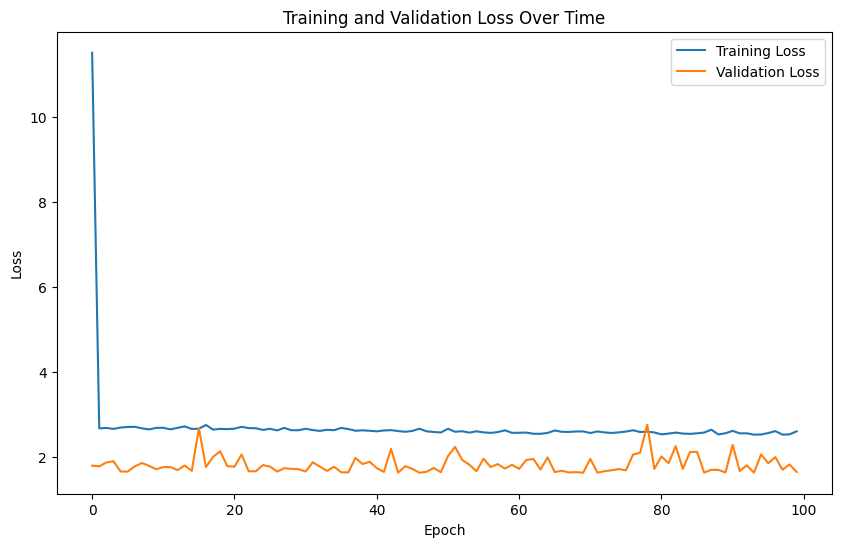

In [36]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()


In [38]:
outfit_index = 0  # Selecting the first outfit as an example

# Extract corresponding embeddings
single_top = Tops_embeddings[outfit_index]
single_bottom = Bottoms_embeddings[outfit_index]
single_bag = Bags_embeddings[outfit_index]
single_shoe = Shoes_embeddings[outfit_index]
single_accessory = Accessories_embeddings[outfit_index]
single_outerwear = Outwear_embeddings[outfit_index]

In [40]:
single_top.shape

(16,)

In [41]:
single_top = np.reshape(single_top, (1, -1))
single_bottom = np.reshape(single_bottom, (1, -1))
single_bag = np.reshape(single_bag, (1, -1))
single_shoe = np.reshape(single_shoe, (1, -1))
single_accessory = np.reshape(single_accessory, (1, -1))
single_outerwear = np.reshape(single_outerwear, (1, -1))

In [45]:
predicted_log_likes = model.predict(
    [single_top, single_bottom, single_shoe, single_bag, single_accessory, single_outerwear]
)


1/1 [==============================] - 0s 23ms/step


In [46]:
predicted_log_likes

array([[5.5719867]], dtype=float32)

In [47]:
predicted_likes = np.exp(predicted_log_likes)
predicted_likes

array([[262.956]], dtype=float32)